# Summary
This notebook explores the Titanic survival dataset with clear EDA, thoughtful missing-value handling, and simple but strong baseline models, culminating in a clean submission file. The focus is on reproducibility and interpretability using the classic Kaggle competition format.

# Objective
Build a model that predicts the Survived label for Titanic passengers using train.csv and test.csv, following the standard Kaggle submission workflow. The notebook emphasizes transparent EDA and baseline modeling that new competitors can easily reproduce and extend.

Labels of data

Survived: 0 = No, 1 = Yes.

Pclass: 1st, 2nd, 3rd (proxy for socio-economic status).

Embarked: C = Cherbourg, Q = Queenstown, S = Southampton.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load libraries for data visualization


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset


In [3]:
Test = pd.read_csv(r"F:\DATA\Kaggle_projects\Titanic_basic\test.csv")
Train = pd.read_csv(r"F:\DATA\Kaggle_projects\Titanic_basic\train.csv")

# Exploratory analysis

In [4]:
print (Train.info())
print (Train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
(891, 12)


Notice: Data in Cabin, Age, Embarked is missing.

unfortunatly Cabin column missing values can not be dealt with easily.

In [5]:
print (Test.info())
print (Test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None
(418, 11)


Notice: Data in Cabin, Age, Fare is missing.

unfortunatly Cabin column missing values can not be dealt with easily.

In [6]:
Test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
Train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's check all unique values in train dataset

In [8]:
print('Unique values of Age in train dataset',Train['Age'].unique().shape)
print('Unique values of Fare in train dataset',Train['Fare'].unique().shape)
print('Unique values of PassengerId in train dataset',Train['PassengerId'].unique().shape)
print('Unique values of Pclass in train dataset',Train['Pclass'].unique().shape)
print('Unique values of name in train dataset',Train['Name'].unique().shape)
print('Unique values of ticket in train dataset',Train['Ticket'].unique().shape)
print('Unique values of Embarked in train dataset',Train['Embarked'].unique().shape)
print('Unique values of SibSp in train dataset',Train['SibSp'].unique().shape)
print('Unique values of Parch in train dataset',Train['Parch'].unique().shape)
print('Unique values of sex in train dataset',Train['Sex'].unique().shape)

Unique values of Age in train dataset (89,)
Unique values of Fare in train dataset (248,)
Unique values of PassengerId in train dataset (891,)
Unique values of Pclass in train dataset (3,)
Unique values of name in train dataset (891,)
Unique values of ticket in train dataset (681,)
Unique values of Embarked in train dataset (4,)
Unique values of SibSp in train dataset (7,)
Unique values of Parch in train dataset (7,)
Unique values of sex in train dataset (2,)


Let's check all unique values in train dataset

In [9]:
print('Unique values of Age in Test dataset',Test['Age'].unique().shape)
print('Unique values of Fare in Test dataset',Test['Fare'].unique().shape)
print('Unique values of PassengerId in Test dataset',Test['PassengerId'].unique().shape)
print('Unique values of Pclass in Test dataset',Test['Pclass'].unique().shape)
print('Unique values of name in Test dataset',Test['Name'].unique().shape)
print('Unique values of ticket in Test dataset',Test['Ticket'].unique().shape)
print('Unique values of Embarked in Test dataset',Test['Embarked'].unique().shape)
print('Unique values of SibSp in Test dataset',Test['SibSp'].unique().shape)
print('Unique values of Parch in Test dataset',Test['Parch'].unique().shape)
print('Unique values of sex in Test dataset',Test['Sex'].unique().shape)

Unique values of Age in Test dataset (80,)
Unique values of Fare in Test dataset (170,)
Unique values of PassengerId in Test dataset (418,)
Unique values of Pclass in Test dataset (3,)
Unique values of name in Test dataset (418,)
Unique values of ticket in Test dataset (363,)
Unique values of Embarked in Test dataset (3,)
Unique values of SibSp in Test dataset (7,)
Unique values of Parch in Test dataset (8,)
Unique values of sex in Test dataset (2,)


unique values table

| Column Name    | Train    | Test        |
|----------------|----------|-------------|
| Age            |  89      |  80         |
| Fare           |  248     |  170        |
| PassengerId    |  891     |  418        |
| Pclass         |  3       |  3          |
| Name           |  891     |  418        |
| ticket         |  681     |  363        |
| Embarked       |  4       |  3          |
| SibSp          |  7       |  7          |
| Parch          |  7       |  8          |
| sex            |  2       |  2          |

for smooth analysis we provide number to catagorical data

In [10]:
Train['Sex'] = Train['Sex'].map({'male': 0, 'female': 1})
Train['Embarked'] = Train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
Test['Sex'] = Test['Sex'].map({'male': 0, 'female': 1})
Test['Embarked'] = Test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [11]:
print(Train['Sex'].value_counts())
print(Train['Embarked'].value_counts())
print(Train['Pclass'].value_counts())
print(Train['SibSp'].value_counts())
print(Train['Parch'].value_counts())
print(Train['Survived'].value_counts())

Sex
0    577
1    314
Name: count, dtype: int64
Embarked
0.0    644
1.0    168
2.0     77
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
Survived
0    549
1    342
Name: count, dtype: int64


Drop the irrealavent columns from the data set

In [12]:
cleaned_train = Train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
cleaned_test = Test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [13]:
cleaned_train.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0.0
1,1,1,1,38.0,1,0,71.2833,1.0
2,1,3,1,26.0,0,0,7.9250,0.0
3,1,1,1,35.0,1,0,53.1000,0.0
4,0,3,0,35.0,0,0,8.0500,0.0


In [14]:
cleaned_train.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.362205
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.636157
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [15]:
cleaned_test.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [16]:
cleaned_test.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,2.265550,0.363636,30.272590,0.447368,0.392344,35.627188,0.464115
std,0.841838,0.481622,14.181209,0.896760,0.981429,55.907576,0.685516
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,0.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


Trying to deal with missing values

Pre-assumption: All data is related to each other

(null hyputhesis: All data is related to each other)

Trying correlation analysis with embarked

In [17]:
# Separate rows with missing values in the 'embarked' column
missing_embarked = cleaned_train[cleaned_train['Embarked'].isnull()]

# Separate rows with non-missing values in the 'embarked' column
non_missing_embarked = cleaned_train[cleaned_train['Embarked'].notnull()]


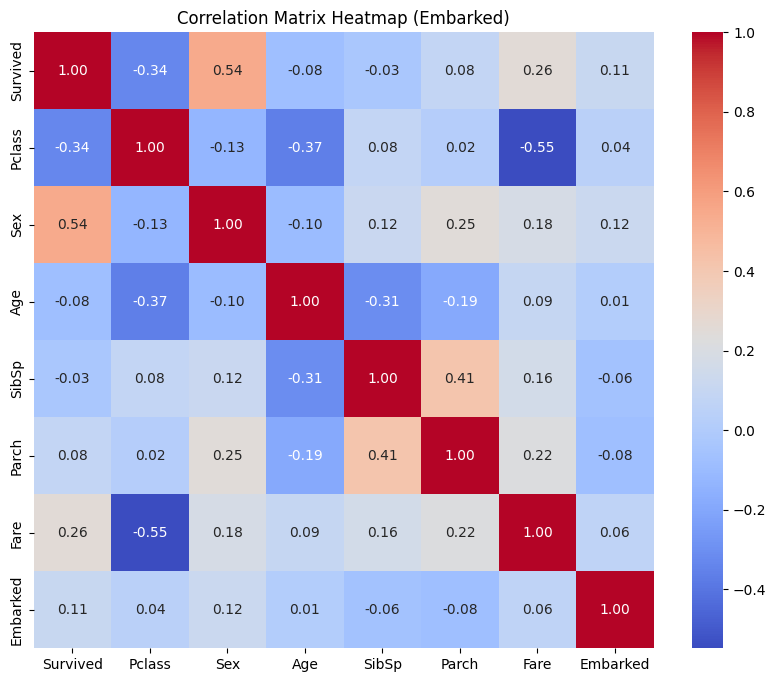

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(non_missing_embarked.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Embarked)')
plt.show()

There is not any relation of other features with Embarked column so we will use modal class to deal with missing values of this columns

Trying correlation analysis with age 

In [19]:
# Separate rows with missing values in the 'embarked' column
missing_age = cleaned_train[cleaned_train['Age'].isnull()]

# Separate rows with non-missing values in the 'embarked' column
non_missing_age = cleaned_train[cleaned_train['Age'].notnull()]


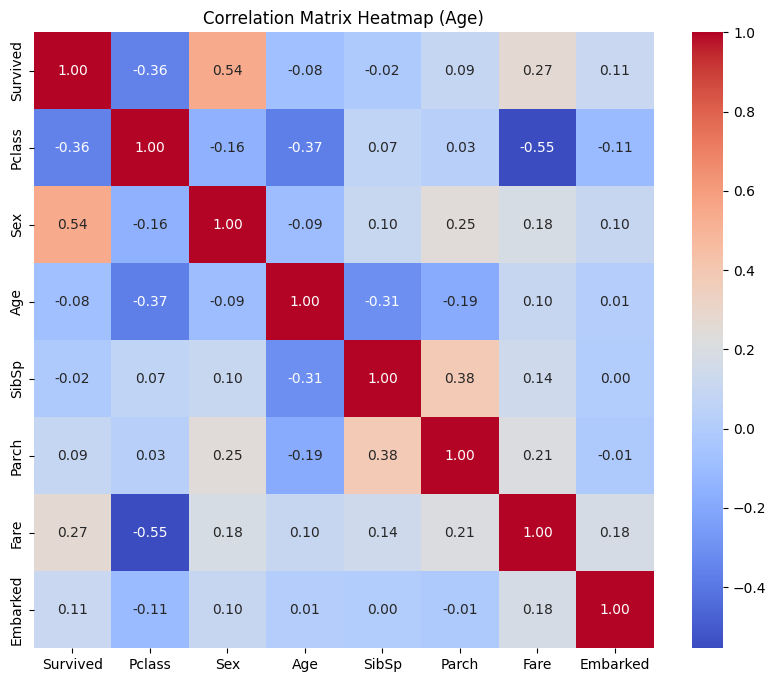

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(non_missing_age.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Age)')
plt.show()

There is also no good coorelation to be found. so for age we will use median class

Failed to accept null hypothesis 

# Data cleaning

In [21]:
mode_embarked = cleaned_train['Embarked'].mode()[0]
cleaned_train['Embarked'] = cleaned_train['Embarked'].fillna(mode_embarked)
median_age = cleaned_train['Age'].median()
cleaned_train['Age'] = cleaned_train['Age'].fillna(median_age)
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(3), int64(5)
memory usage: 55.8 KB


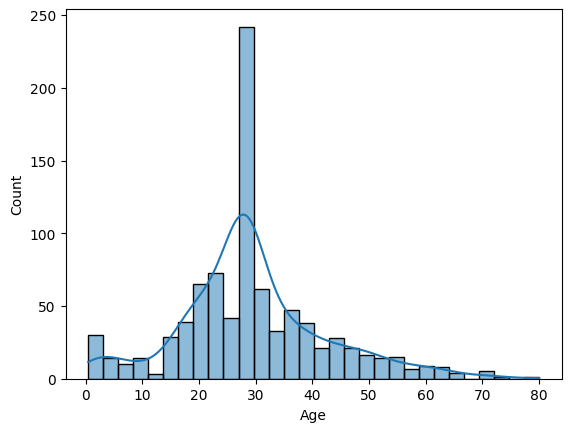

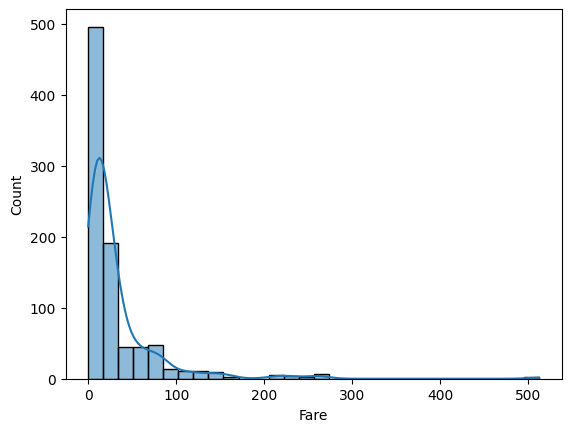

In [22]:
sns.histplot(cleaned_train['Age'], bins=30, kde=True)
plt.show()

sns.histplot(cleaned_train['Fare'], bins=30, kde=True)
plt.show()


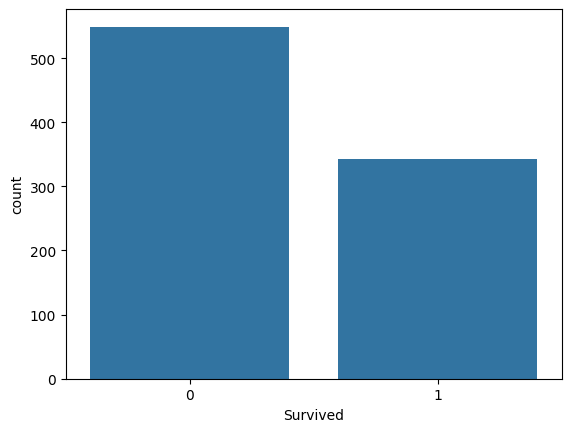

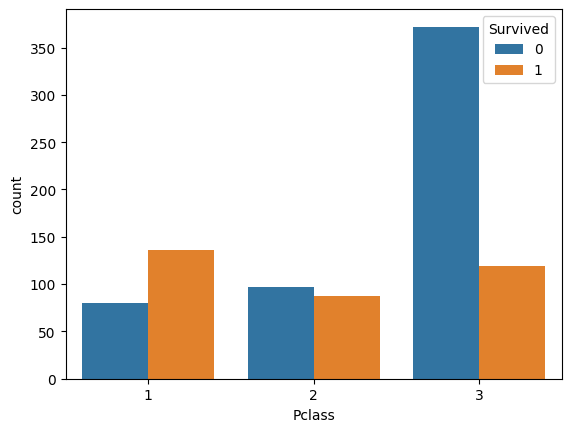

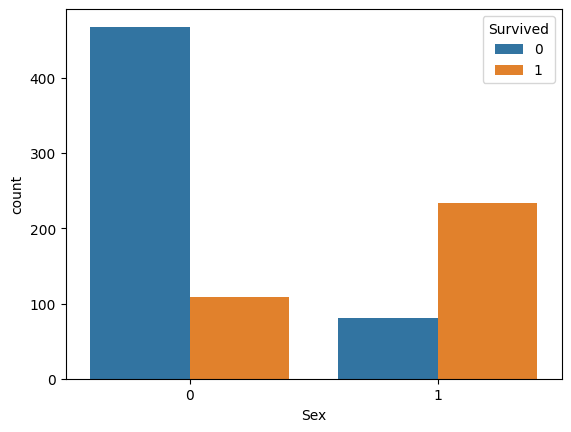

In [23]:
sns.countplot(x='Survived', data=cleaned_train)
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=cleaned_train)
plt.show()

sns.countplot(x='Sex', hue='Survived', data=cleaned_train)
plt.show()


Statistical tests

In [24]:
mode_embarked = Train['Embarked'].mode()[0]
Train['Embarked'] = Train['Embarked'].fillna(mode_embarked)
median_age = Train['Age'].median()
Train['Age'] = Train['Age'].fillna(median_age)
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 83.7+ KB


In [25]:
# for all categorical columns
# null hypothesis: the two categorical columns are independent
# alternative hypothesis: the two categorical columns are dependent
from scipy.stats import chi2_contingency

# "Embarked vs Survived"
table = pd.crosstab(Train["Embarked"], Train["Survived"])
chi2, p, dof, expected = chi2_contingency(table)  # Yates correction auto-applied if 2x2 and correction=True
print("Chi squre calculted for Embarked vs Survived:",chi2)
print("p value of Embarked vs Survived: %.2f" % p)
print("dof of Embarked vs Survived:",dof)

# "Pclass vs Survived"
table = pd.crosstab(Train["Pclass"], Train["Survived"])
chi2, p, dof, expected = chi2_contingency(table)  # Yates correction auto-applied if 2x2 and correction=True
print("Chi squre calculted for Pclass vs Survived:",chi2)
print("p value of Pclass vs Survived: %.2f" % p)
print("dof of Pclass vs Survived:",dof)

# "Sex vs Survived"
table = pd.crosstab(Train["Sex"], Train["Survived"])
chi2, p, dof, expected = chi2_contingency(table)  # Yates correction auto-applied if 2x2 and correction=True
print("Chi squre calculted for Sex vs Survived:",chi2)
print("p value of Sex vs Survived: %.2f" % p)
print("dof of Sex vs Survived:",dof)

# "Parch vs Survived"
table = pd.crosstab(Train["Parch"], Train["Survived"])
chi2, p, dof, expected = chi2_contingency(table)  # Yates correction auto-applied if 2x2 and correction=True
print("Chi squre calculted for Parch vs Survived:",chi2)
print("p value of Parch vs Survived: %.2f" % p)
print("dof of Parch vs Survived:",dof)

#"SibSp vs Survived"
table = pd.crosstab(Train["SibSp"], Train["Survived"])
chi2, p, dof, expected = chi2_contingency(table)  # Yates correction auto-applied if 2x2 and correction=True
print("Chi squre calculted for SibSp vs Survived:",chi2)
print("p value of SibSp vs Survived: %.2f" % p)
print("dof of SibSp vs Survived:",dof)

Chi squre calculted for Embarked vs Survived: 25.964452881874788
p value of Embarked vs Survived: 0.00
dof of Embarked vs Survived: 2
Chi squre calculted for Pclass vs Survived: 102.88898875696056
p value of Pclass vs Survived: 0.00
dof of Pclass vs Survived: 2
Chi squre calculted for Sex vs Survived: 260.71702016732104
p value of Sex vs Survived: 0.00
dof of Sex vs Survived: 1
Chi squre calculted for Parch vs Survived: 27.925784060236168
p value of Parch vs Survived: 0.00
dof of Parch vs Survived: 6
Chi squre calculted for SibSp vs Survived: 37.2717929152043
p value of SibSp vs Survived: 0.00
dof of SibSp vs Survived: 6


In [26]:
# for all numerical relations
# null hypothesis: the two categorical columns are independent
# alternative hypothesis: the two categorical columns are dependent
from scipy.stats import ttest_ind

# Age vs Survived
t_stat, p = ttest_ind(Train['Age'], Train['Survived'], equal_var=True)

print("t calculted for Age vs Survived:",t_stat)
print("p value of Age vs Survived: %.2f" % p)

# Fare vs Survived
t_stat, p = ttest_ind(Train['Fare'], Train['Survived'], equal_var=True)

print("t calculted for Fare vs Survived:",t_stat)
print("p value of Fare vs Survived: %.2f" % p)

t calculted for Age vs Survived: 66.38951053085201
p value of Age vs Survived: 0.00
t calculted for Fare vs Survived: 19.112798902198033
p value of Fare vs Survived: 0.00


# Modeling

appling a Random Forest Classifier to the data without missing values

In [27]:
X = cleaned_train.drop('Survived', axis=1)
y = cleaned_train['Survived']

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

# Create Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=45)

# Train the classifier
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8379888268156425


In [29]:
# Create Random Forest classifier
nrf = RandomForestClassifier(n_estimators=100,max_depth=10,min_samples_split=5, min_samples_leaf=2, max_features='sqrt', criterion='log_loss', random_state=52, bootstrap=True)

# Train the classifier
nrf.fit(X_train, y_train)

# Predict on the test set
y_npred = nrf.predict(X_test)

# Evaluate accuracy
print("Accuracy:", accuracy_score(y_test, y_npred))

Accuracy: 0.88268156424581


appling a XGboost to the data

In [30]:
from xgboost import XGBClassifier
model = XGBClassifier(objective="binary:logistic", random_state=52)
model.fit(X_train, y_train)
y_xpred = model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_xpred))

Test accuracy: 0.8379888268156425


In [31]:
nmodel = XGBClassifier(
    objective="binary:logistic",
    early_stopping_rounds=50,  # set in constructor in newer versions
    eval_metric="logloss",     # set in constructor in newer versions
    random_state=42
)
nmodel.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
y_nxpred = nmodel.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_nxpred))


Test accuracy: 0.88268156424581


Applying randomforest to the train data

In [32]:
Survived = nrf.predict(cleaned_test)
PassengerId = Test['PassengerId']
output = pd.DataFrame({'PassengerId': PassengerId, 'Survived': Survived})
output.to_csv('submission.csv', index=False)

Neural natwork

In [5]:
# After building and fitting the preprocessing pipeline:
X_train_np = preprocess.fit_transform(X_train)    # e.g., ColumnTransformer with OneHotEncoder
n_features = X_train_np.shape[11]                  # number of numeric input columns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
import tensorflow as tf

tf.random.set_seed(50)
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(n_features,),
                kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


IndexError: tuple index out of range